In [ ]:
# Data processing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from imblearn.over_sampling import RandomOverSampler # for resampling unbalanced categories
from sklearn.preprocessing import LabelEncoder # Encodes string or categorical data to numerical values
from sklearn.model_selection import train_test_split # splits data into different sets
from sklearn.preprocessing import StandardScaler # scales data to be centered at the mean with min/max 1/-1
# Model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgbm
from sklearn.svm import SVC
# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Visualizations and plots
import matplotlib.pyplot as plt # generic plotting
import seaborn as sns # styled plotting

# Utility libraries
from pathlib import Path # directory path

# Note: You can write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
%%html
<!-- HTML style -->
<style>
table {float:left}
</style>

# Load dataset

In [ ]:
lung_cancer_data_path = Path('/content/survey lung cancer (2).csv')
lung_cancer_df = pd.read_csv(lung_cancer_data_path, sep=',')
# Let's make sure we've loaded the data correctly by checking that we can interrogate the data
lung_cancer_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
# Let's check the shape of the data set
lung_cancer_df.shape

(309, 16)

In [ ]:
# Let's look at the data types and number of non-null data points in the data set
lung_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
# Let's take a look at the general statistics of the numerical data in the data set
lung_cancer_df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
lung_cancer_df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
lung_cancer_df.duplicated().sum()

np.int64(33)

In [ ]:
# We can do this 'inplace' since we don't care to save the duplicates. Otherwise we would save to a new copy of the df
lung_cancer_df.drop_duplicates(inplace=True)

In [ ]:
# Here we convert all string columns to numerical values and remap the 1/2 columns to 0/1
# LabelEncoder() is alphabetical for strings, so 'GENDER' was F/M and is now 0/1 respectively and 'LUNG_CANCER' was No/Yes and is 0/1 respectively.
# LabelEncoder() will remap the 1/2 columns to 0/1 respectively
# LabelEncoder() will not remap the numeric values in the 'AGE' column, but it has been specifically skipped to avoid any mistakes

for categorical_column in lung_cancer_df:
    if categorical_column == 'AGE': # Skip the 'AGE' column as it is continuous numerical attribute
        continue
    lung_cancer_df[categorical_column]=LabelEncoder().fit_transform(lung_cancer_df[categorical_column])

lung_cancer_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


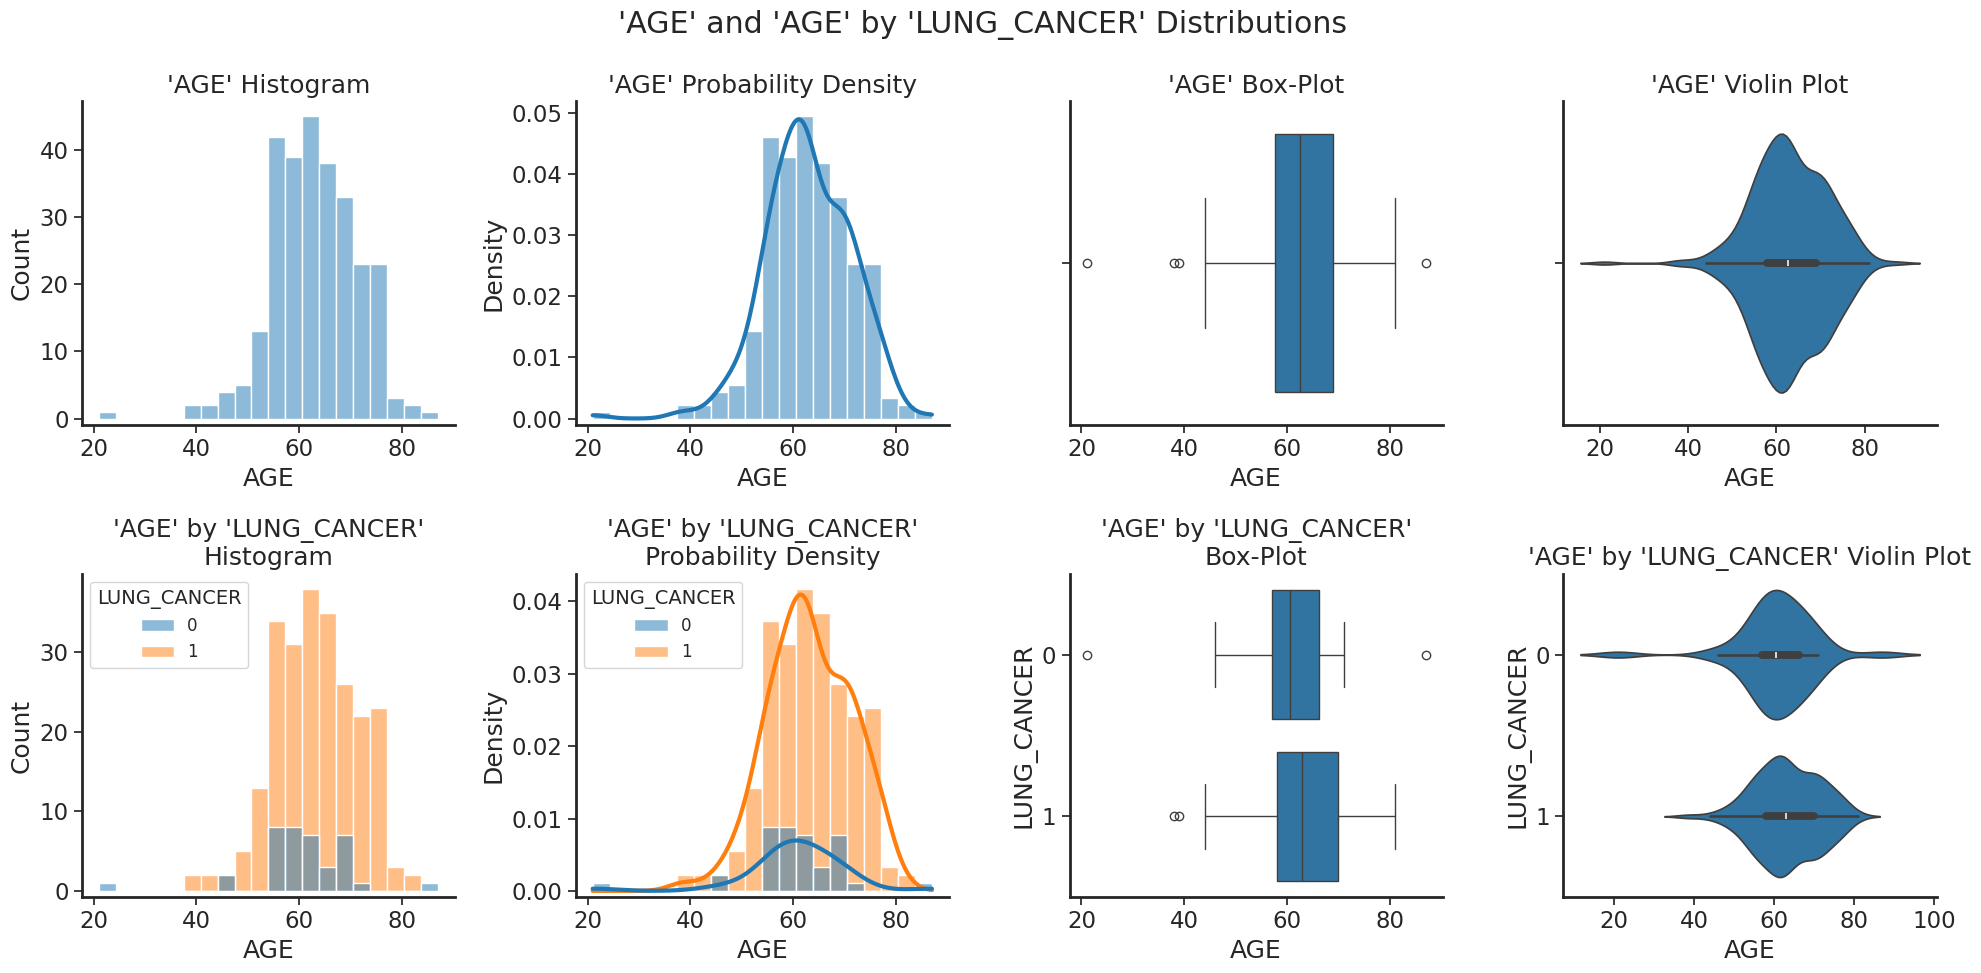

In [ ]:

# Temporarily handle style parameters for the plots so it returns to default after
with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("ticks"):
    # Set up the canvas for the figure
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    # Plotting just 'AGE'
    sns.histplot(data=lung_cancer_df, x='AGE', ax=axs[0, 0], alpha=0.5, stat='count')
    axs[0, 0].set_title("'AGE' Histogram")

    sns.histplot(data=lung_cancer_df, x='AGE', kde=True, line_kws={'linewidth':3}, ax=axs[0, 1], stat='density')
    axs[0, 1].set_title("'AGE' Probability Density")

    sns.boxplot(data=lung_cancer_df, x='AGE', ax=axs[0, 2])
    axs[0, 2].set_title("'AGE' Box-Plot")

    sns.violinplot(data=lung_cancer_df, x='AGE', ax=axs[0, 3])
    axs[0, 3].set_title("'AGE' Violin Plot")

    # Plotting 'AGE' by 'LUNG_CANCER'
    sns.histplot(data=lung_cancer_df, x='AGE', hue='LUNG_CANCER', ax=axs[1, 0], stat='count')
    axs[1, 0].set_title("'AGE' by 'LUNG_CANCER'\nHistogram")

    sns.histplot(data=lung_cancer_df, x='AGE', hue='LUNG_CANCER', kde=True, line_kws={'linewidth':3}, ax=axs[1, 1], stat='density')
    axs[1, 1].set_title("'AGE' by 'LUNG_CANCER'\nProbability Density")

    sns.boxplot(data=lung_cancer_df, x='AGE', y='LUNG_CANCER', orient='h', ax=axs[1, 2])
    axs[1, 2].set_title("'AGE' by 'LUNG_CANCER'\nBox-Plot")

    sns.violinplot(data=lung_cancer_df, x='AGE', y='LUNG_CANCER', orient='h', ax=axs[1, 3])
    axs[1, 3].set_title("'AGE' by 'LUNG_CANCER' Violin Plot")

    for i, ax in enumerate(axs.flatten()):
        # Add a tiny space below the plot and the x-axis
        if i  in [0, 1, 4, 5]:
            y_bounds = ax.get_ybound()
            y_bottom = (y_bounds[0] + y_bounds[1]) / 50 * -1
            ax.set_ylim(y_bottom, ax.get_ybound()[1])
        # Remove or enhance plot spines (bounding box)
        for spine in ['top', 'right']:
            ax.spines[spine].set_linewidth(0)
        for spine in ['bottom', 'left']:
            ax.spines[spine].set_linewidth(2)
    # What am I without a name?
    plt.suptitle("'AGE' and 'AGE' by 'LUNG_CANCER' Distributions")
    # Clean up presentation, this is a classic :)
    plt.tight_layout()
#     # If you want to export with a specific resolution
#     plt.savefig(Path(r'/path_to/directory_where/you_want_to/save.png'), dpi=100, bbox_inches='tight')
    plt.show()

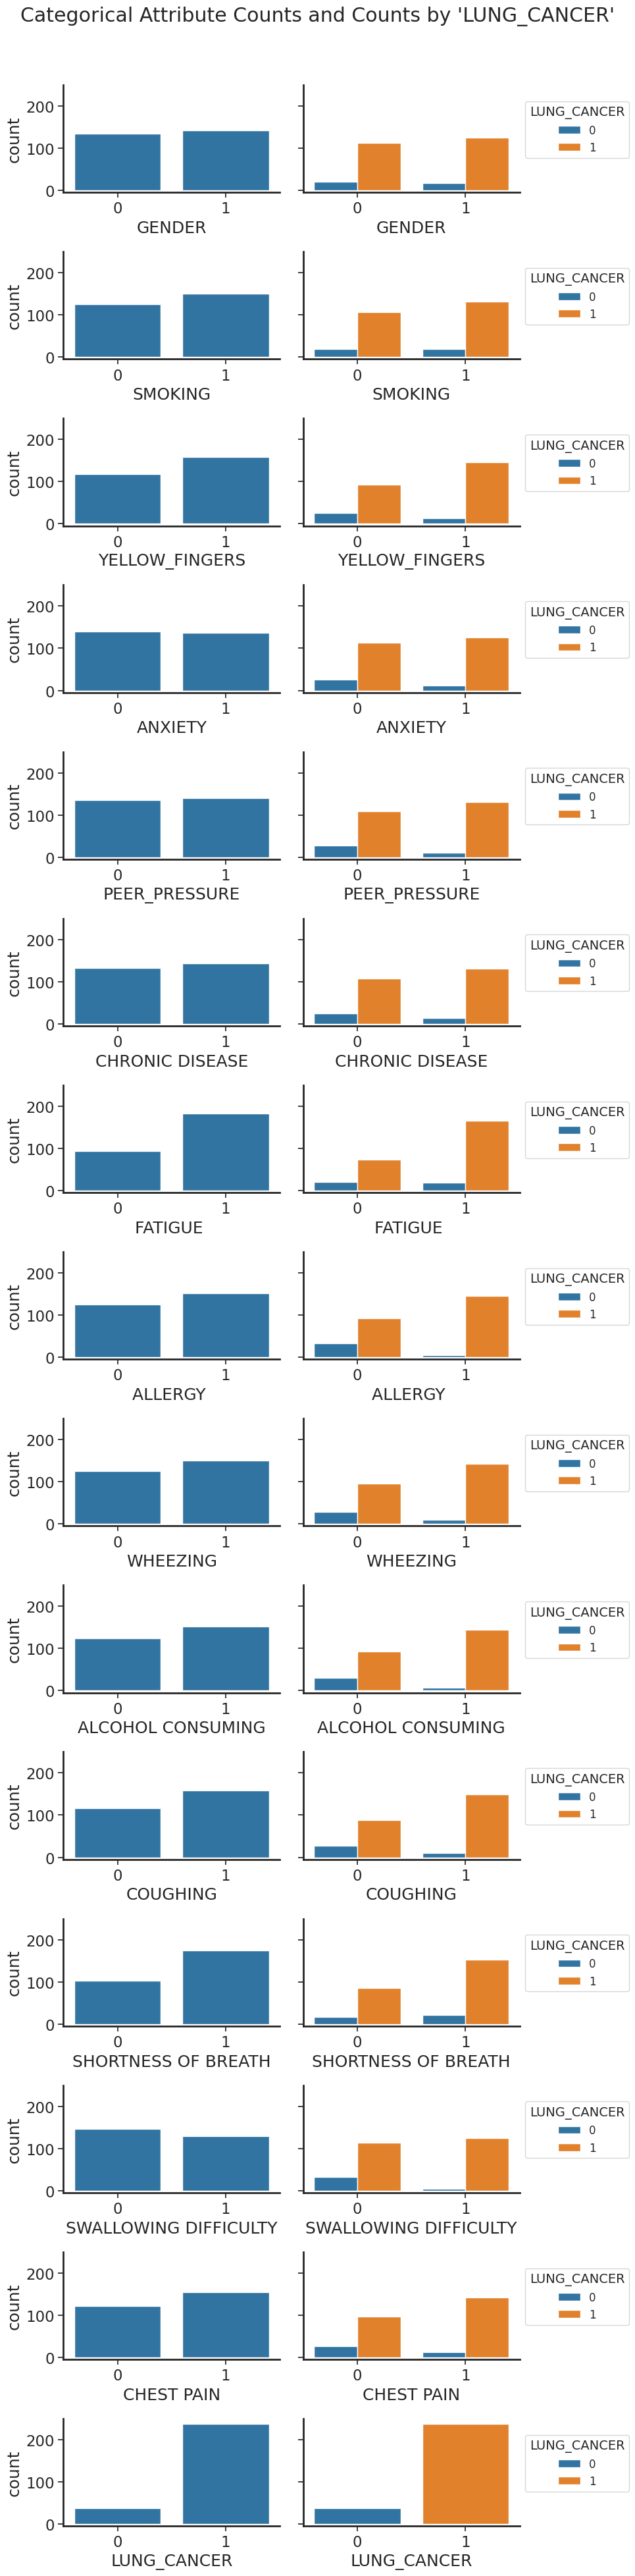

In [ ]:
# Temporarily handle style parameters for the plots so it returns to default after
with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("ticks"):
    # Set up the canvas for the figure
    fig, axs = plt.subplots(15, 2, figsize=(10, 40), sharey=True)
    # Loop over attributes that are not 'AGE'
    cat_attributes = [col for col in lung_cancer_df.columns if col != 'AGE']
    for i, cat_attr in enumerate(cat_attributes):
        if cat_attr != 'AGE':
            sns.countplot(data=lung_cancer_df, x=cat_attr, ax=axs[i, 0])
            sns.countplot(data=lung_cancer_df, x=cat_attr, hue='LUNG_CANCER', ax=axs[i, 1])
            sns.move_legend(axs[i, 1], bbox_to_anchor=(1,0.9),loc='upper left')
    # More Style baby!
    for ax in axs.flatten():
        # Adjust the bottom of the plot to the x-axis with a tiny space
        y_bounds = ax.get_ybound()
        y_bottom = (y_bounds[0] + y_bounds[1]) / 50 * -1
        ax.set_ylim(y_bottom, ax.get_ybound()[1])
        # Remove or enhance plot spines (bounding box)
        for spine in ['top', 'right']:
            ax.spines[spine].set_linewidth(0)
        for spine in ['bottom', 'left']:
            ax.spines[spine].set_linewidth(2)
    # What am I without a name?
    plt.suptitle("Categorical Attribute Counts and Counts by 'LUNG_CANCER'")
    # Clean up presentation, this is a classic :)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
#     # If you want to export with a specific resolution
#     plt.savefig(Path(r'/path_to/directory_where/you_want_to/save.png'), dpi=100, bbox_inches='tight')
    plt.show()

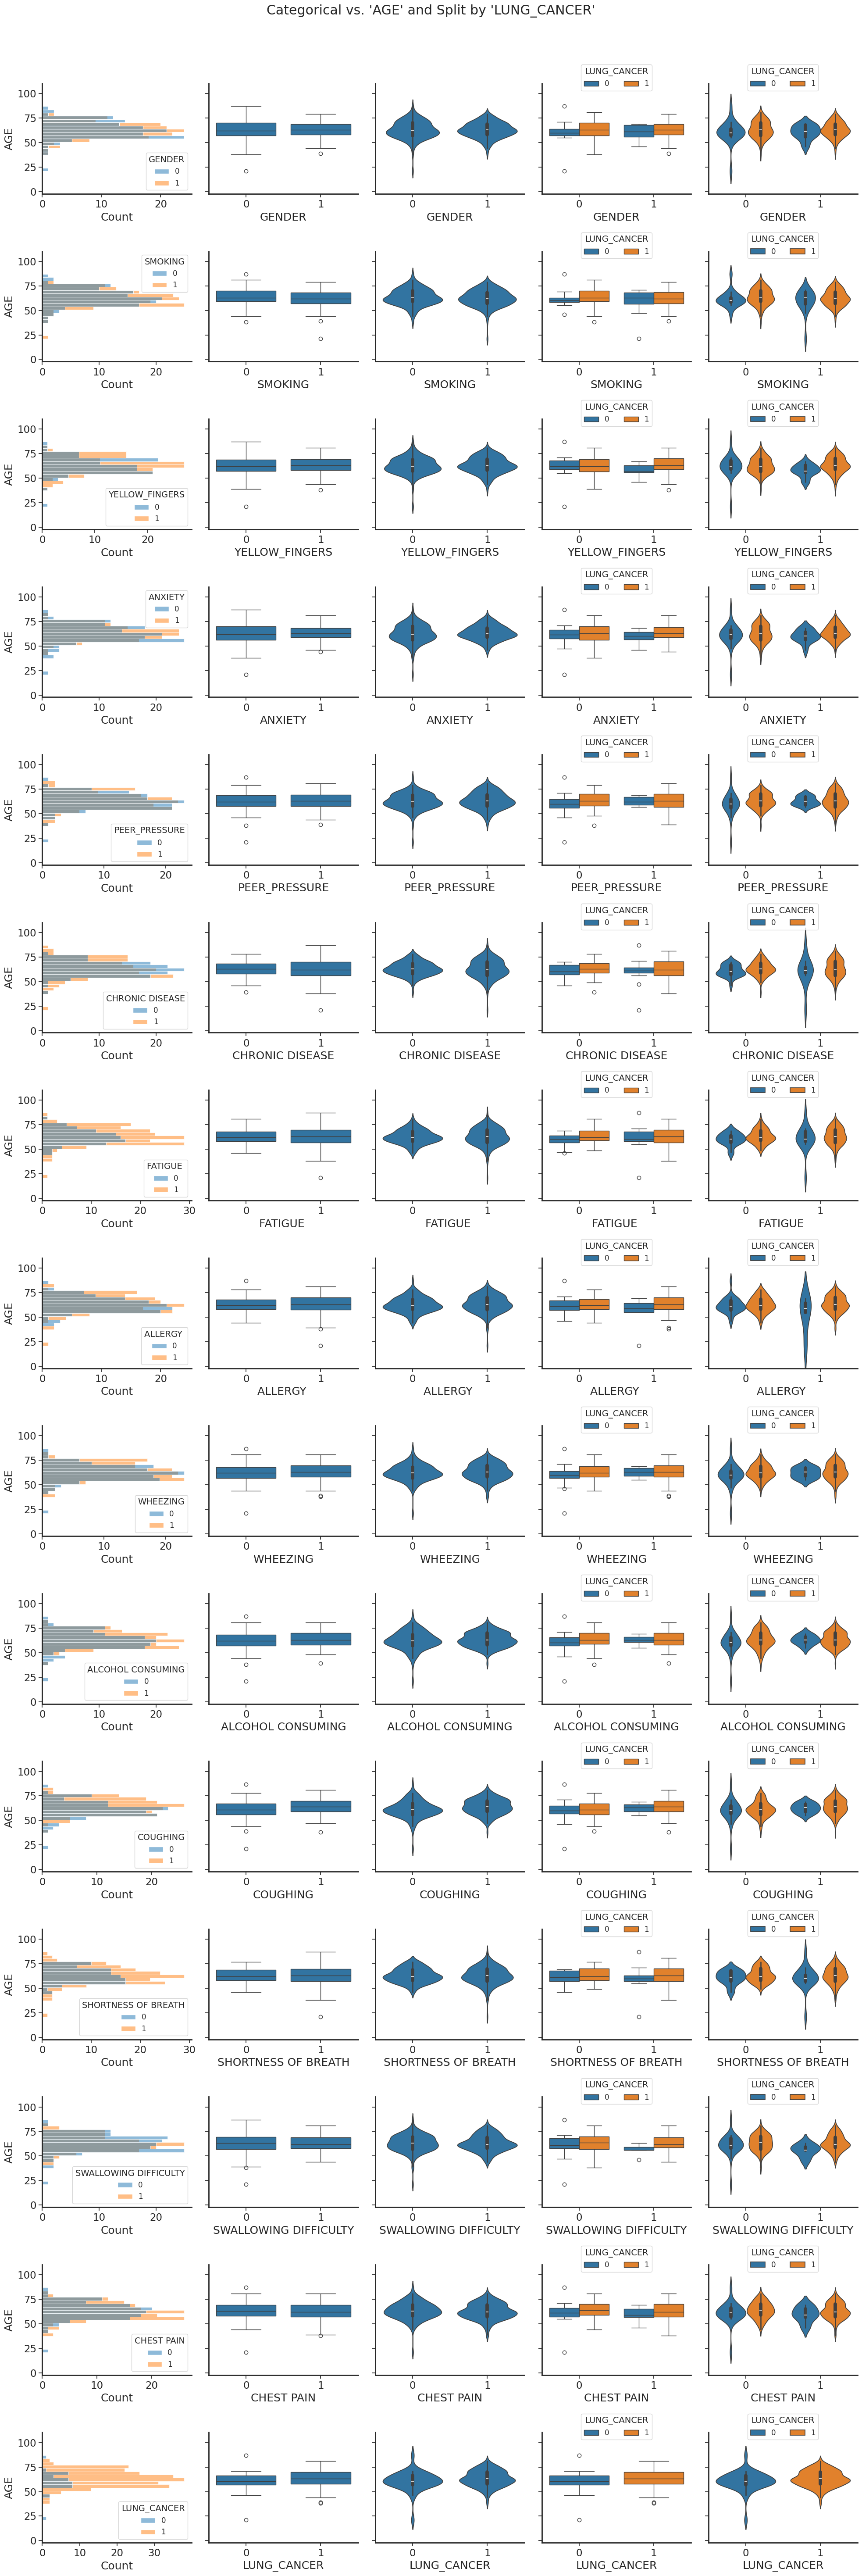

In [ ]:
# Temporarily handle style parameters for the plots so it returns to default after
with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("ticks"):
    # Set up the canvas for the figure
    fig, axs = plt.subplots(15, 5, figsize=(20, 60), sharey=True)
    # Loop over attributes that are not 'AGE'
    cat_attributes = [col for col in lung_cancer_df.columns if col != 'AGE']
    for i, cat_attr in enumerate(cat_attributes):
        if cat_attr != 'AGE':
            sns.histplot(data=lung_cancer_df, y='AGE', hue=cat_attr, ax=axs[i, 0])
            sns.boxplot(data=lung_cancer_df, x=cat_attr, y='AGE', ax=axs[i, 1])
            sns.violinplot(data=lung_cancer_df, x=cat_attr, y='AGE', ax=axs[i, 2])
            sns.boxplot(data=lung_cancer_df, x=cat_attr, y='AGE', hue='LUNG_CANCER', ax=axs[i, 3])
            sns.move_legend(axs[i, 3], ncol=2, bbox_to_anchor=(0.5,0.9),loc='lower center')
            sns.violinplot(data=lung_cancer_df, x=cat_attr, y='AGE', hue='LUNG_CANCER', ax=axs[i, 4])
            sns.move_legend(axs[i, 4], ncol=2, bbox_to_anchor=(0.5,0.9),loc='lower center')
    # More Style baby!
    for ax in axs.flatten():
        # Adjust the bottom of the plot to the x-axis with a tiny space
        y_bounds = ax.get_ybound()
        y_bottom = (y_bounds[0] + y_bounds[1]) / 50 * -1
        ax.set_ylim(y_bottom, ax.get_ybound()[1])
        # Remove or enhance plot spines (bounding box)
        for spine in ['top', 'right']:
            ax.spines[spine].set_linewidth(0)
        for spine in ['bottom', 'left']:
            ax.spines[spine].set_linewidth(2)
    plt.suptitle("Categorical vs. 'AGE' and Split by 'LUNG_CANCER'")
    # Clean up presentation, this is a classic :)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
#     # If you want to export with a specific resolution
#     plt.savefig(Path(r'/path_to/directory_where/you_want_to/save.png'), dpi=100, bbox_inches='tight')
    plt.show()

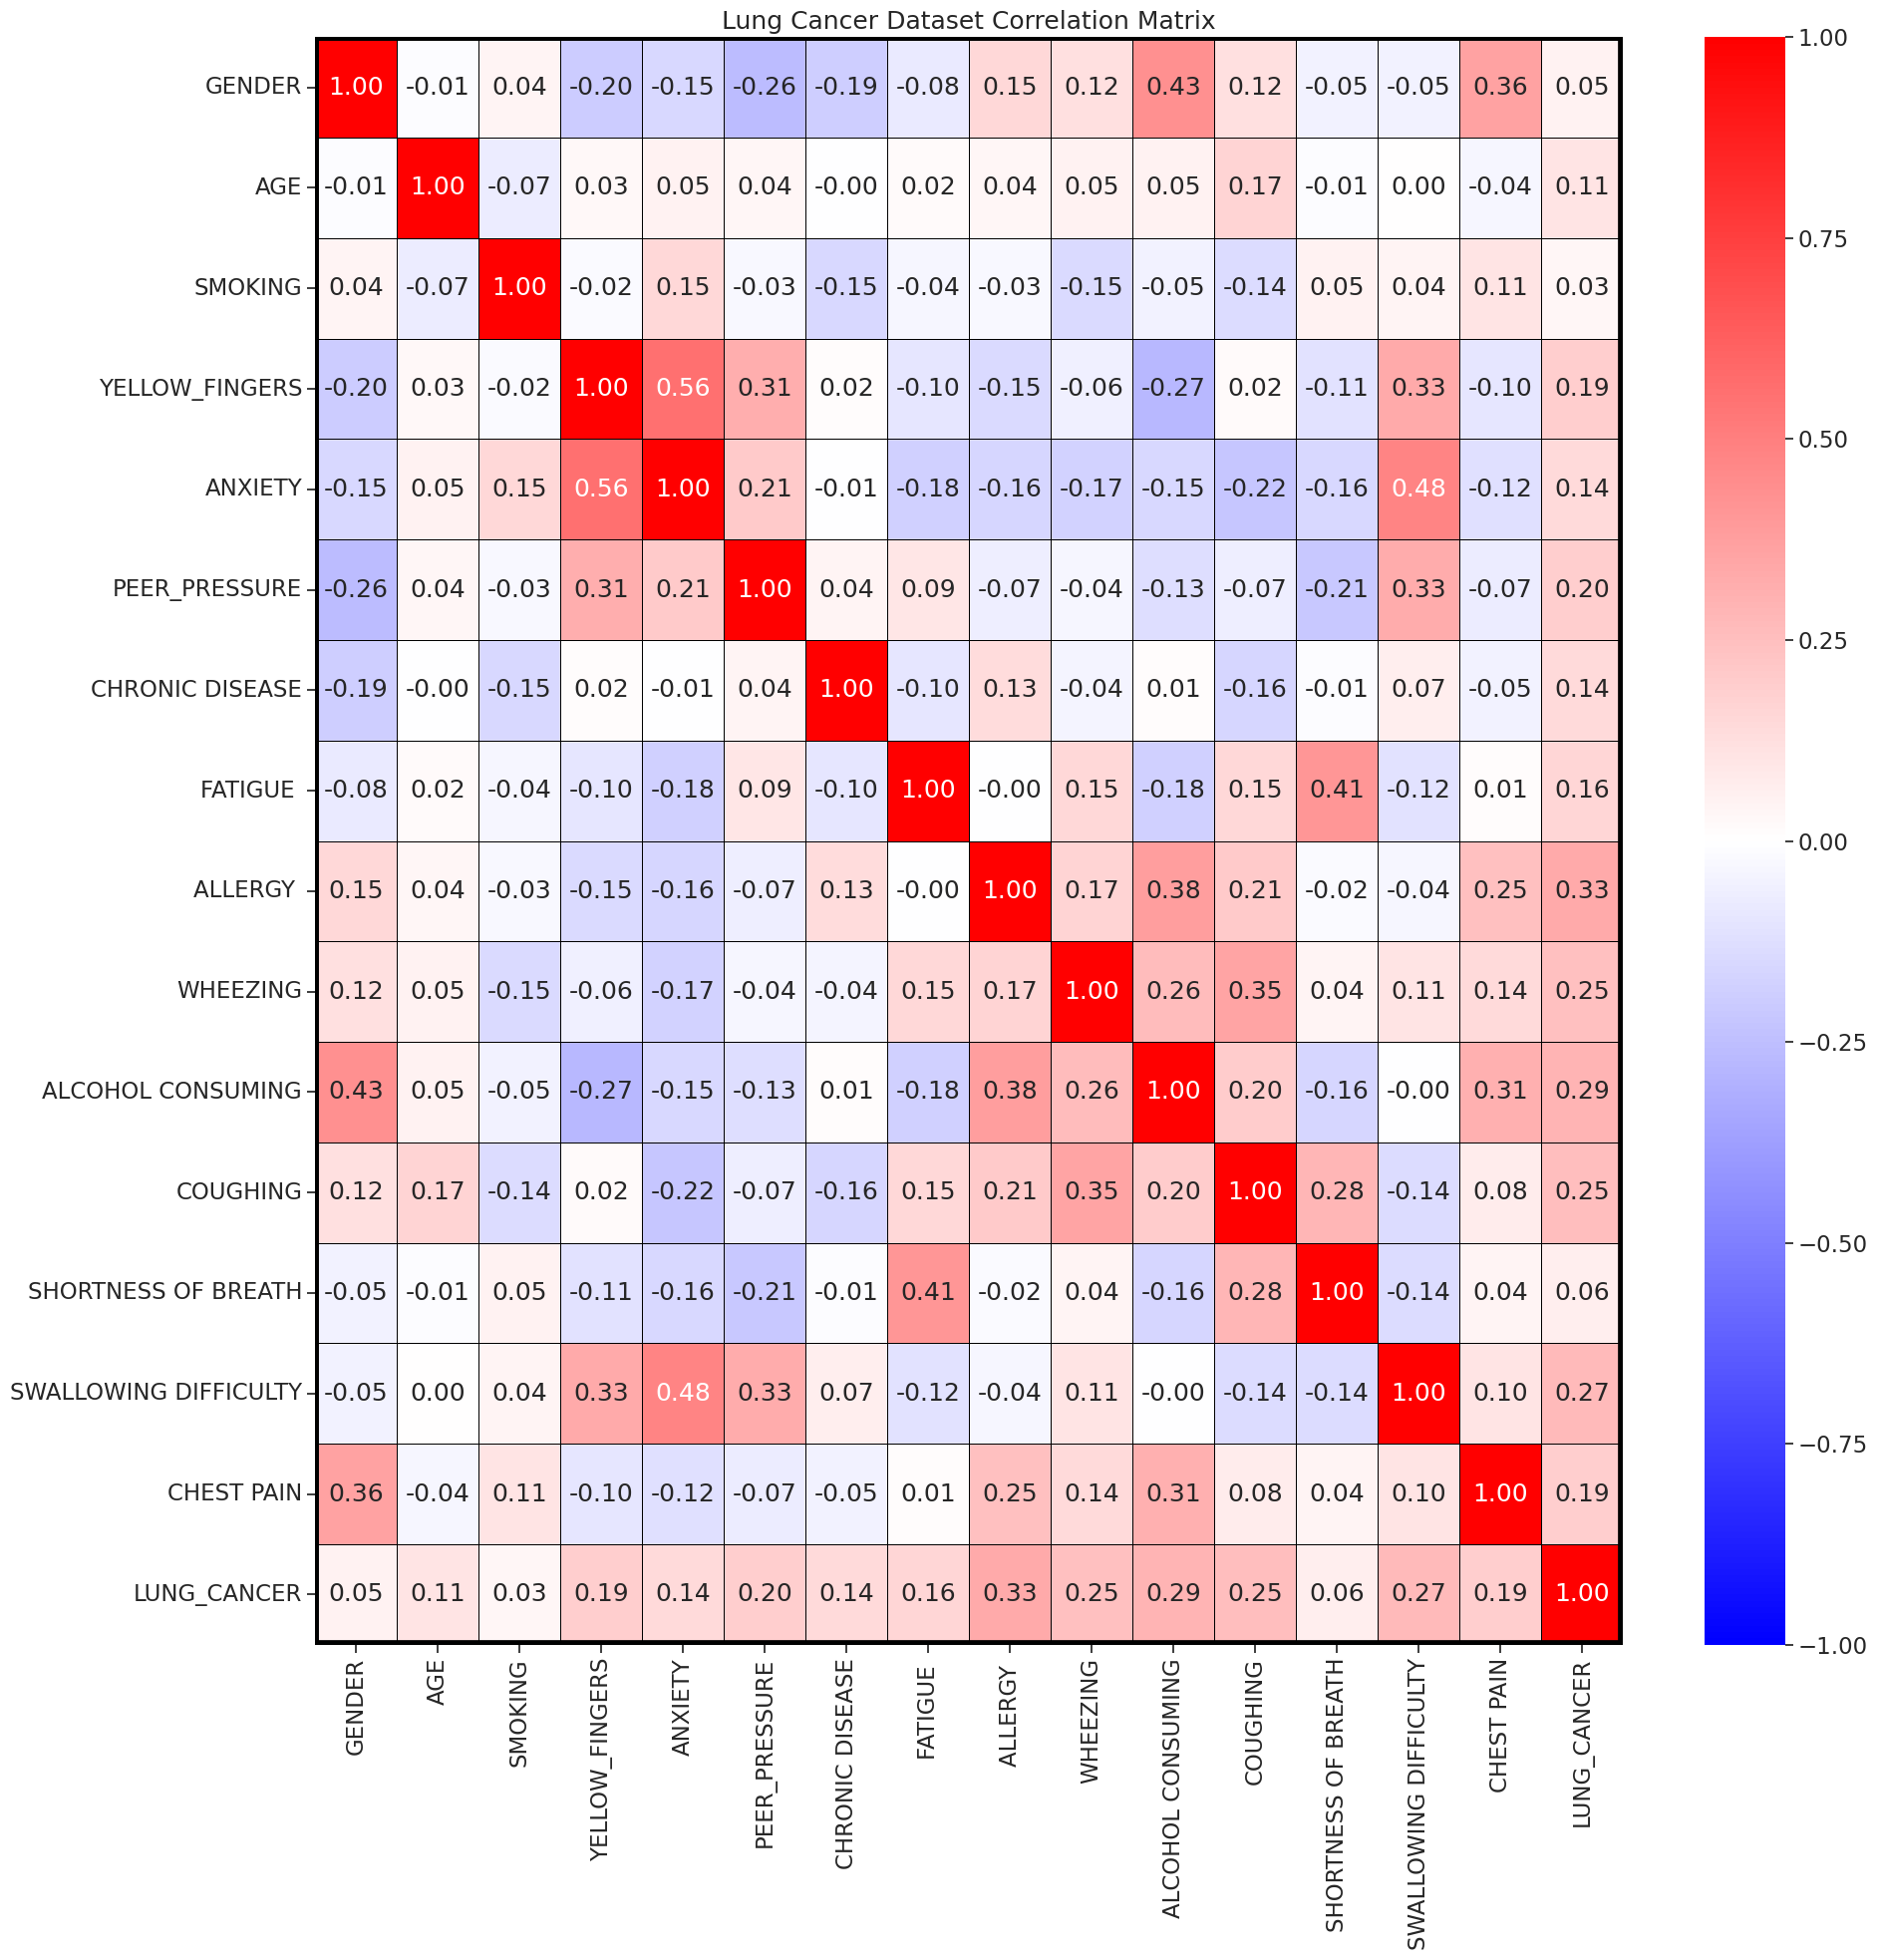

In [ ]:
# Here a diverging colormap was selected to make positive and negative correlation more easily discernible
with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("ticks"):
    fig, axs = plt.subplots(figsize=(20,20))
    lung_cancer_df_corr = lung_cancer_df.corr()
    sns.heatmap(lung_cancer_df_corr, annot=True, linewidth=0.5, linecolor='k', fmt='0.2f', cmap='bwr', vmin=-1, vmax=1, ax=axs)
    plt.title("Lung Cancer Dataset Correlation Matrix")
    axs.axhline(y=0, color='k',linewidth=5)
    axs.axhline(y=lung_cancer_df_corr.shape[1], color='k',linewidth=7)
    axs.axvline(x=0, color='k',linewidth=5)
    axs.axvline(x=lung_cancer_df_corr.shape[0], color='k',linewidth=7)
    plt.tight_layout()
    plt.show()


# Data Preprocessing

In [ ]:
# Separate independent and dependent attributes
X = lung_cancer_df.drop('LUNG_CANCER', axis=1)
y = lung_cancer_df['LUNG_CANCER']

In [ ]:
# Test_train_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (207, 15)
Test shape: (69, 15)


In [ ]:
# resample minority class in both test and train
# We do this after the split so that duplicates don't pollute either set
X_train_resamp, y_train_resamp = RandomOverSampler().fit_resample(X_train, y_train)
X_test_resamp, y_test_resamp = RandomOverSampler().fit_resample(X_test, y_test)
print(f'Train_resampled shape : {X_train_resamp.shape}\nTest_resampled shape: {X_test_resamp.shape}')

Train_resampled shape : (358, 15)
Test_resampled shape: (118, 15)


In [ ]:
# standard scale 'AGE' in both test and train. Make sure to fit the train data and just transform the test data to avoid creating a new mean in the test data set.
scaler = StandardScaler()
X_train_resamp['AGE']=scaler.fit_transform(X_train_resamp[['AGE']])
X_test_resamp['AGE']=scaler.transform(X_test_resamp[['AGE']])
X_train_resamp.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,0.200932,1,1,1,1,1,0,0,0,1,0,0,1,1
1,0,0.058206,0,0,0,0,1,1,0,0,0,0,1,0,0
2,0,-0.369969,0,0,0,0,1,1,0,0,0,0,1,0,0
3,1,-1.654496,0,1,0,0,1,1,1,1,1,1,1,0,1
4,1,-0.369969,1,1,1,1,1,0,1,0,1,0,0,1,1


#### 6. Light Gradient Boosting Machine Classifier: Recall - 0.95

In [ ]:
# LGBM
lgbm = lgbm.LGBMClassifier()
lgbm.fit(X_train_resamp, y_train_resamp)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 179, number of negative: 179
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 358, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

LGBMClassifier()

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        59
           1       0.81      0.95      0.88        59

    accuracy                           0.86       118
   macro avg       0.88      0.86      0.86       118
weighted avg       0.88      0.86      0.86       118



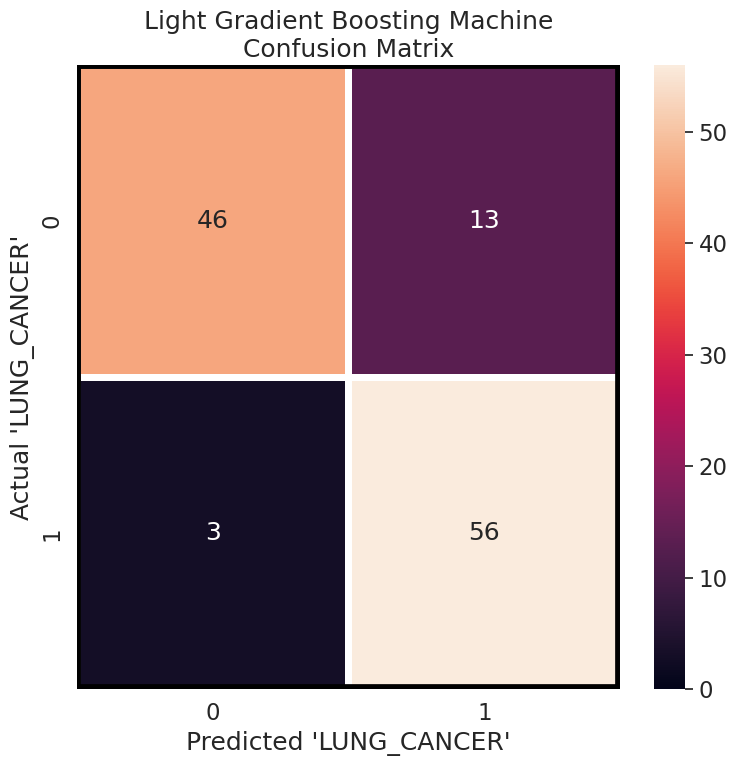

In [ ]:
# LGBM Model Evaluation
y_pred_lgbm = lgbm.predict(X_test_resamp)

print(classification_report(y_test_resamp, y_pred_lgbm))

confusion_lgbm = confusion_matrix(y_test_resamp, y_pred_lgbm)

with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("white"):
    fig, axs = plt.subplots(figsize=(8,8))
    sns.heatmap(confusion_lgbm, annot=True, linewidth=5, vmin=0, cmap='rocket', ax=axs)
    axs.set_title('Light Gradient Boosting Machine\nConfusion Matrix')
    axs.set_xlabel("Predicted 'LUNG_CANCER'")
    axs.set_ylabel("Actual 'LUNG_CANCER'")
    # Style baby! yeah!
    axs.axhline(y=0, color='k',linewidth=5)
    axs.axhline(y=confusion_logreg.shape[1], color='k',linewidth=7)
    axs.axvline(x=0, color='k',linewidth=5)
    axs.axvline(x=confusion_logreg.shape[0], color='k',linewidth=7)
    # Nothing but the classics
    plt.tight_layout()
    plt.show()

In [ ]:
# Logistic Regression
param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 400, 500, 1000],
            'max_iter':[50, 75, 100, 200, 300, 400, 500, 1000]}
logreg = RandomizedSearchCV(LogisticRegression(solver='lbfgs'), param_grid,cv=5)
logreg.fit(X_train_resamp, y_train_resamp)

print(logreg.best_params_)

{'max_iter': 400, 'C': 0.1}


              precision    recall  f1-score   support

           0       0.87      1.00      0.93        59
           1       1.00      0.85      0.92        59

    accuracy                           0.92       118
   macro avg       0.93      0.92      0.92       118
weighted avg       0.93      0.92      0.92       118



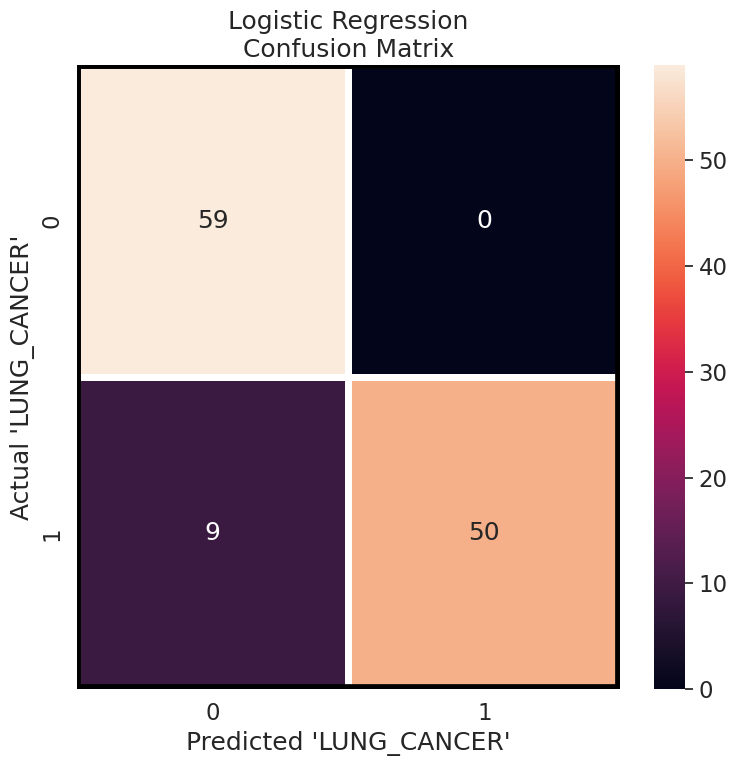

In [ ]:
# Logistic Regression Model Evaluation
y_pred_logreg = logreg.predict(X_test_resamp)

print(classification_report(y_test_resamp, y_pred_logreg))

confusion_logreg = confusion_matrix(y_test_resamp, y_pred_logreg)

with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("white"):
    fig, axs = plt.subplots(figsize=(8,8))
    sns.heatmap(confusion_logreg, annot=True, linewidth=5, vmin=0, cmap='rocket', ax=axs)
    axs.set_title('Logistic Regression\nConfusion Matrix')
    axs.set_xlabel("Predicted 'LUNG_CANCER'")
    axs.set_ylabel("Actual 'LUNG_CANCER'")
    # Style baby! yeah!
    axs.axhline(y=0, color='k',linewidth=5)
    axs.axhline(y=confusion_logreg.shape[1], color='k',linewidth=7)
    axs.axvline(x=0, color='k',linewidth=5)
    axs.axvline(x=confusion_logreg.shape[0], color='k',linewidth=7)
    # Nothing but the classics
    plt.tight_layout()
    plt.show()

#### 4. Random Forest Classifier: Recall - 0.95

In [ ]:
# Random Forest
param_grid = {
    'n_estimators': [25, 30, 40, 50, 75, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8, 9, 10, 11, 12],
    'criterion' :['gini', 'entropy']
}
randfor = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
randfor.fit(X_train_resamp, y_train_resamp)

print(randfor.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 150}


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        59
           1       0.93      0.95      0.94        59

    accuracy                           0.94       118
   macro avg       0.94      0.94      0.94       118
weighted avg       0.94      0.94      0.94       118



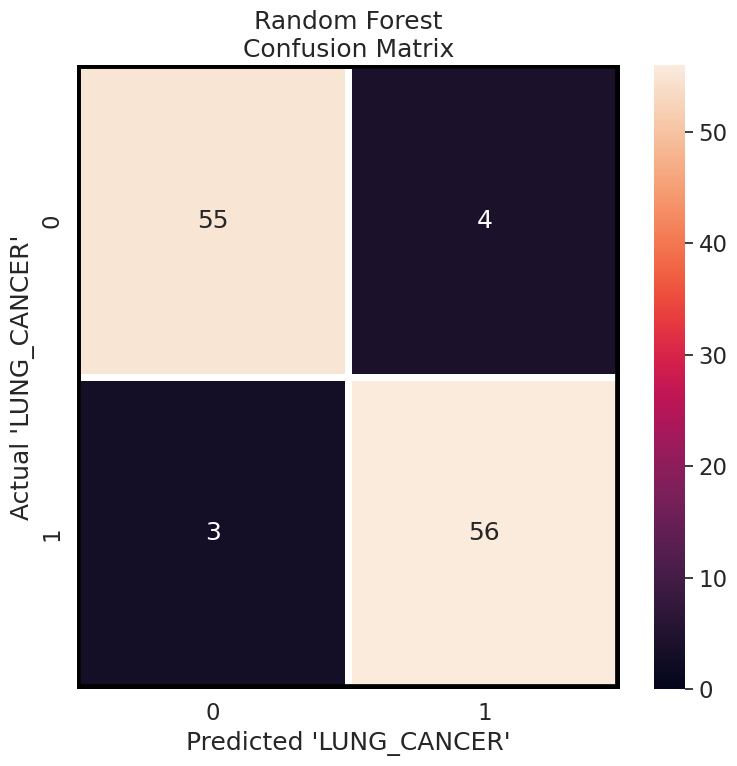

In [ ]:
# Random Forest Model Evaluation
y_pred_randfor = randfor.predict(X_test_resamp)

print(classification_report(y_test_resamp, y_pred_randfor))

confusion_randfor = confusion_matrix(y_test_resamp, y_pred_randfor)

with sns.plotting_context("notebook", font_scale=1.5, rc={"legend.fontsize":12, "legend.title_fontsize":14}), sns.axes_style("white"):
    fig, axs = plt.subplots(figsize=(8,8))
    sns.heatmap(confusion_randfor, annot=True, linewidth=5, vmin=0, cmap='rocket', ax=axs)
    axs.set_title('Random Forest\nConfusion Matrix')
    axs.set_xlabel("Predicted 'LUNG_CANCER'")
    axs.set_ylabel("Actual 'LUNG_CANCER'")

    axs.axhline(y=0, color='k',linewidth=5)
    axs.axhline(y=confusion_logreg.shape[1], color='k',linewidth=7)
    axs.axvline(x=0, color='k',linewidth=5)
    axs.axvline(x=confusion_logreg.shape[0], color='k',linewidth=7)

    plt.tight_layout()
    plt.show()

In [ ]:
!pip install pytorch-tabnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# ✅ Load Data
df = pd.read_csv("survey lung cancer (2).csv")

# 🎯 Target and Features
X = df.drop("LUNG_CANCER", axis=1)
y = df["LUNG_CANCER"]

# 🔄 Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
feature_columns = X.columns.tolist()
# 🏷 Encode target
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)  # YES=1, NO=0

# ⚖ Handle imbalance with RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# ✂ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 🔢 Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🧠 TabNet Classifier
clf = TabNetClassifier(
    seed=42,
    verbose=1
)

# 🚀 Train the model
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,
    batch_size=32,
    virtual_batch_size=16
)
clf.save_model("tabnet_lung_model")

# 🧾 Predictions
y_pred = clf.predict(X_test)

# 📊 Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_encoder.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.82772 | val_0_accuracy: 0.62963 |  0:00:00s
epoch 1  | loss: 0.55069 | val_0_accuracy: 0.86111 |  0:00:01s
epoch 2  | loss: 0.47138 | val_0_accuracy: 0.85185 |  0:00:02s
epoch 3  | loss: 0.38945 | val_0_accuracy: 0.87963 |  0:00:02s
epoch 4  | loss: 0.35711 | val_0_accuracy: 0.92593 |  0:00:03s
epoch 5  | loss: 0.34    | val_0_accuracy: 0.90741 |  0:00:03s
epoch 6  | loss: 0.37413 | val_0_accuracy: 0.87963 |  0:00:04s
epoch 7  | loss: 0.33875 | val_0_accuracy: 0.83333 |  0:00:04s
epoch 8  | loss: 0.318   | val_0_accuracy: 0.7963  |  0:00:04s
epoch 9  | loss: 0.33095 | val_0_accuracy: 0.91667 |  0:00:05s
epoch 10 | loss: 0.32298 | val_0_accuracy: 0.84259 |  0:00:05s
epoch 11 | loss: 0.34386 | val_0_accuracy: 0.83333 |  0:00:05s
epoch 12 | loss: 0.37102 | val_0_accuracy: 0.87037 |  0:00:06s
epoch 13 | loss: 0.34579 | val_0_accuracy: 0.85185 |  0:00:06s
epoch 14 | loss: 0.31376 | val_0_accuracy: 0.83333 |  0:00:06s
epoch 15 | loss: 0.30628 | val_0_accuracy: 0.87037 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
def predict_lung_cancer(custom_input, clf, label_encoders, scaler, target_encoder, feature_columns):
    import pandas as pd
    # Convert to DataFrame
    input_df = pd.DataFrame([custom_input])

    # Encode categorical features
    for col in input_df.select_dtypes(include=['object']).columns:
        le = label_encoders.get(col)
        if le:
            input_df[col] = le.transform(input_df[col])

    # Reorder to match training
    input_df = input_df[feature_columns]

    # Scale
    input_scaled = scaler.transform(input_df)

    # Predict
    pred = clf.predict(input_scaled)
    pred_label = target_encoder.inverse_transform(pred)

    return pred_label[0]


In [ ]:
# 🧪 Custom Prediction Input
custom_input = {
    'AGE': 60,
    'GENDER': 'M',
    'SMOKING': 1,
    'YELLOW_FINGERS': 1,
    'ANXIETY': 1,
    'PEER_PRESSURE': 0,
    'CHRONIC DISEASE': 0,
    'FATIGUE ': 1,
    'ALLERGY ': 0,
    'WHEEZING': 1,
    'ALCOHOL CONSUMING': 1,
    'COUGHING': 1,
    'SHORTNESS OF BREATH': 1,
    'SWALLOWING DIFFICULTY': 0,
    'CHEST PAIN': 1
}

# 🔮 Make prediction
prediction = predict_lung_cancer(custom_input, clf, label_encoders, scaler, target_encoder, feature_columns)
print("Prediction:", prediction)

# 🎯 Human-readable output
if prediction == 'YES':
    print("🔴 The person is likely to have lung cancer.")
else:
    print("🟢 The person is not likely to have lung cancer.")

Prediction: NO
🟢 The person is not likely to have lung cancer.


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class TabNetWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        # TabNet is already trained, return self
        return self

    def predict(self, X):
        preds = self.model.predict(X)
        return preds.astype(int)

    def predict_proba(self, X):
        probs = self.model.predict_proba(X)
        return probs



Early stopping occurred at epoch 51 with best_epoch = 31 and best_val_0_accuracy = 0.9537
Successfully saved model at tabnet_lung_model.zip
📊 TabNet Accuracy: 0.9537037037037037

TabNet Classification Report:
               precision    recall  f1-score   support

          NO       0.91      1.00      0.95        51
         YES       1.00      0.91      0.95        57

    accuracy                           0.95       108
   macro avg       0.96      0.96      0.95       108
weighted avg       0.96      0.95      0.95       108



/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


📊 Random Forest Accuracy: 0.9907407407407407

Random Forest Classification Report:
               precision    recall  f1-score   support

          NO       0.98      1.00      0.99        51
         YES       1.00      0.98      0.99        57

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108

✅ Ensemble Accuracy: 0.9722222222222222

📋 Ensemble Classification Report:
               precision    recall  f1-score   support

          NO       0.94      1.00      0.97        51
         YES       1.00      0.95      0.97        57

    accuracy                           0.97       108
   macro avg       0.97      0.97      0.97       108
weighted avg       0.97      0.97      0.97       108



<ipython-input-42-597338766a86>:100: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


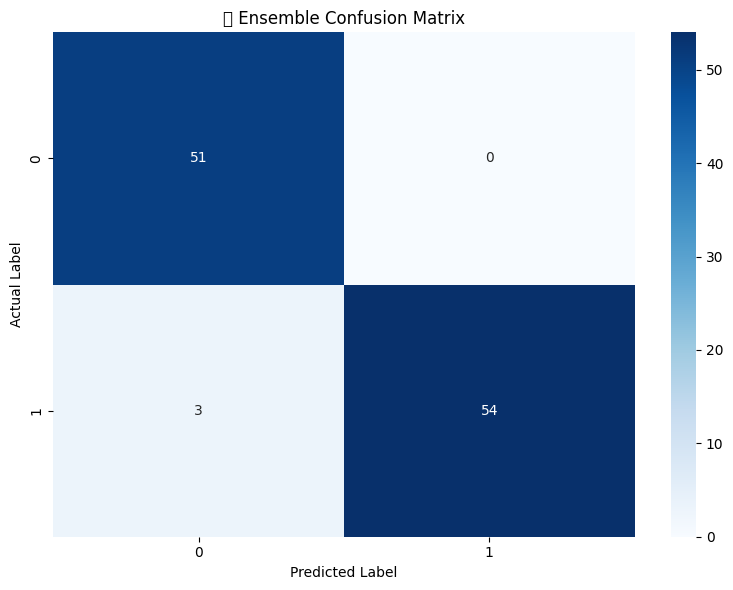

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# 📁 Load Data
df = pd.read_csv("survey lung cancer (2).csv")

# 🎯 Features and Target
X = df.drop("LUNG_CANCER", axis=1)
y = df["LUNG_CANCER"]

# 🔄 Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# 🏷 Encode target
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)  # YES=1, NO=0

# ⚖ Balance classes with RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# ✂ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 🔢 Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧠 Train TabNet Classifier
clf = TabNetClassifier(seed=42, verbose=0)
clf.fit(
    X_train=X_train_scaled, y_train=y_train,
    eval_set=[(X_test_scaled, y_test)],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,
    batch_size=32,
    virtual_batch_size=16
)
clf.save_model("tabnet_lung_model")

# 🧾 TabNet Evaluation
y_pred_tabnet = clf.predict(X_test_scaled)
print("📊 TabNet Accuracy:", accuracy_score(y_test, y_pred_tabnet))
print("\nTabNet Classification Report:\n", classification_report(y_test, y_pred_tabnet, target_names=target_encoder.classes_))

# 🌲 Random Forest Tuning and Training
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt'],
    'max_depth': [10, 12],
    'criterion': ['gini']
}
randfor = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
randfor.fit(X_train_scaled, y_train)

# 🧾 Random Forest Evaluation
y_pred_rf = randfor.predict(X_test_scaled)
print("📊 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=target_encoder.classes_))

# 🧩 Manual Ensemble: Soft Voting
# Predict probabilities from both models
y_pred_prob_tabnet = clf.predict_proba(X_test_scaled)  # TabNet's probability
y_pred_prob_rf = randfor.best_estimator_.predict_proba(X_test_scaled)  # Random Forest's probability

# Average probabilities (Soft Voting)
y_pred_ensemble_prob = (y_pred_prob_tabnet + y_pred_prob_rf) / 2

# Get final prediction by choosing class with highest probability
y_pred_ensemble = np.argmax(y_pred_ensemble_prob, axis=1)

# 🧾 Ensemble Evaluation
print("✅ Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("\n📋 Ensemble Classification Report:\n", classification_report(y_test, y_pred_ensemble, target_names=target_encoder.classes_))

# 📊 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("🧠 Ensemble Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()
